### Exercise
Load the Auto.csv file, except for the "name" column. Apply k-means to see if there are any clusters in the data.
Apply PCA to the Auto dataset, reduce to two dimensions, and apply k-means.

-------------Silhoutee Score Interpretations
0.71-1.0
A strong structure has been found

0.51-0.70
A reasonable structure has been found

0.26-0.50
The structure is weak and could be artificial. Try additional methods of data analysis.

< 0.25
No substantial structure has been found

In [274]:
import pandas as pd
##PRE PROCESS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#Accuracy
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv("d:/auto.csv")
df.drop("name",inplace=True,axis=1)

In [67]:
def update_missings():
    hp_missing_ind = df[df.horsepower=='?'].index
    df.loc[hp_missing_ind,"horsepower"]=float('nan')
    df.loc[hp_missing_ind,"horsepower"]

NameError: name 'df' is not defined

In [1]:
df.loc[hp_missing_ind, 'horsepower'] = int(df.horsepower.mean() )
round(df.describe().T, 2)

NameError: name 'df' is not defined

### Preprocessing

In [213]:
##Standard Scaler
Scaler=StandardScaler()
#dfscaler=Scaler.fit(df)
#dfscaler_tranform=Scaler.transform(df)
dfscaler_tranform=Scaler.fit_transform(df)

C:\Users\m003205\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\m003205\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [3]:
####PAC
pca = PCA(n_components=2)
X_pca=pca.fit_transform(df)

NameError: name 'PCA' is not defined

## Model Building with ScalerTranform

In [261]:
#HERE OUR OBJECTIVE IS TO GET INERTIA_ in order to Get Elbow Method and then predict
sl=[]
inertia_score=[]
for i in range(2,12):
    km=KMeans(n_clusters=i)
    km.fit(dfscaler_tranform)
    #interia_score=
    inertia_score.append(km.inertia_)
    sscore=silhouette_score(dfscaler_tranform,km.labels_, metric='euclidean')
    sl.append(sscore)
print(inertia_score,end=' ')
print(sl)

[1584.1572960571496, 1187.7249779464353, 983.409106541666, 828.8353753003528, 749.4480939770816, 679.4219198386741, 633.3777922554073, 594.2495851269036, 556.9960107725278, 526.4660491886476] [0.4149434118064614, 0.3243381909826901, 0.312754005355881, 0.3325670753831573, 0.3367180032286262, 0.2945950713913274, 0.2921059577533051, 0.257960379222171, 0.27175499106680334, 0.26676008462872897]


In [ ]:
#MODEL OPTIONS
km.predict(df)
km.cluster_centers_
km.inertia_
km.labels_
km.n_iter_

### GET ELBOW METHOD

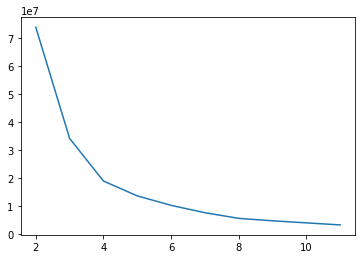

In [267]:
plt.plot(range(2, 12), inertia_score)

In [266]:
print('interia: {}'.format(kmeans.inertia_))
print('Silhoutee Score: {}'.format(silhouette_score(dfscaler_tranform, km.labels_,metric='euclidean')))


interia: 2789283.0815915526
Silhoutee Score: -0.034874193917510274


### Model Building with PCA

In [263]:
sl=[]
inertia_score=[]
for i in range(2,12):
    km=KMeans(n_clusters=i)
    km.fit(X_pca)
    #interia_score=
    inertia_score.append(km.inertia_)
    sscore=silhouette_score(dfscaler_tranform,km.labels_, metric='euclidean')
    sl.append(sscore)
print(inertia_score,end=' ')
print(sl)

[73749435.34379132, 34077659.70937373, 18873955.71307861, 13581778.868273515, 10189067.61289501, 7571978.876170365, 5551370.446291456, 4680699.202411918, 3943513.760332682, 3213408.0874724323] [0.378147942513576, 0.24445842431923864, 0.14321000510858908, 0.09877235455347012, 0.052106810166870146, 0.022961825559880078, 0.0030241259886214303, -0.010896845428283782, -0.02225999330291087, -0.034874193917510274]


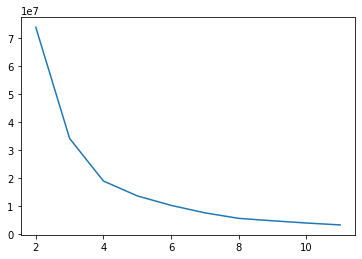

In [215]:
plt.plot(range(2,12),inertia_score)

In [268]:
kmeans=KMeans(n_clusters=6)
kmeans.fit_predict(X_pca)


array([2, 1, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 1, 2, 0, 4, 4, 4, 0, 5, 4, 0,
       0, 0, 4, 3, 3, 3, 3, 0, 0, 0, 5, 4, 2, 2, 2, 2, 1, 3, 1, 1, 3, 3,
       3, 4, 0, 2, 2, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 3, 3, 1, 1,
       1, 3, 3, 3, 3, 0, 1, 1, 3, 1, 4, 0, 4, 0, 0, 0, 0, 0, 5, 1, 1, 1,
       1, 1, 3, 3, 3, 1, 3, 3, 1, 2, 2, 4, 4, 4, 5, 3, 3, 3, 3, 4, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 5, 0, 4, 4, 2, 4, 4, 1, 2, 4, 4, 2, 5, 0, 5,
       4, 1, 2, 2, 1, 3, 3, 3, 3, 0, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 2, 2,
       2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 4, 2, 2, 0, 4, 4, 4, 4, 0, 4, 4, 5,
       2, 4, 4, 4, 4, 5, 0, 0, 4, 0, 0, 1, 1, 1, 1, 2, 2, 4, 2, 5, 0, 5,
       5, 2, 2, 2, 2, 5, 5, 0, 4, 2, 1, 2, 4, 1, 3, 1, 1, 1, 5, 0, 5, 0,
       5, 1, 1, 1, 3, 2, 2, 2, 2, 1, 1, 3, 3, 5, 4, 0, 4, 5, 5, 5, 0, 4,
       4, 4, 5, 5, 5, 5, 5, 2, 1, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 4, 0, 0, 0, 4, 4, 0, 4, 2, 4, 2, 5, 0, 2, 4, 4, 2, 2, 1,
       1, 1, 1, 3, 1, 2, 1, 5, 5, 5, 4, 2, 1, 2, 2,

In [269]:
print('Inertia {}'.format(kmeans.inertia_))
print('Silhoute Score {}'.format(silhouette_score(X_pca,kmeans.labels_)))


Inertia 10154067.394776987
Silhoute Score 0.5155862514268749


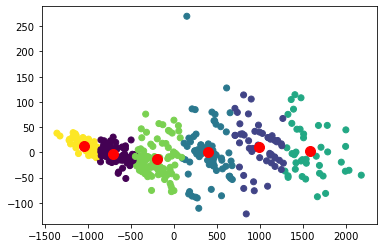

In [273]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmeans.labels_);
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color="red"); # Show the centres

In [285]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_pca)

In [289]:
#print('Inertia {}'.format(dbscan.inertia_))
print('Silhoute Score {}'.format(silhouette_score(X_pca,clusters)))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [280]:
dbscan.inertia_

AttributeError: 'numpy.ndarray' object has no attribute 'inertia_'

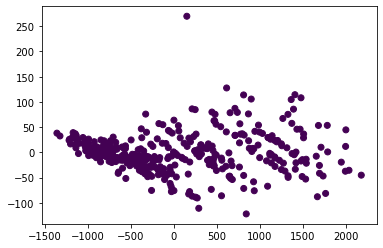

In [287]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=clusters);

In [228]:
X_pca.shape

(397, 2)

In [229]:
dfscaler_tranform.shape

(397, 8)

In [ ]:
##Paste it back to Main
df1['cluster_allo'] = pd.Series(predict, index=df1.index)